In [19]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px



In [29]:
def query_db(query):
    conn = sqlite3.connect('../data/bundesliga3.db')
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

# df_standings = query_db('''SELECT * FROM standings''')
# df_standings.head()
# df_transfers = query_db('''SELECT * FROM transfers''')
df_standings = query_db('''SELECT * FROM standings''')
df_team_stats = query_db('''SELECT * FROM teamStats''')

Team Stats table contains the average team statistics of >100 performance measures each each. 

In [5]:
df_team_stats.head()

,Squad,players,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,CPA,Mis,Dis,Rec,PrgR,season,club_name,club_id,League_Position,season_id
0,Augsburg,28.0,26.2,38.6,34.0,374.0,3060.0,34.0,45.0,29.0,...,104.0,512.0,304.0,8347.0,808.0,19/20,FC Augsburg,167.0,15.0,2019.0
1,Bayern Munich,29.0,26.7,65.1,34.0,374.0,3060.0,34.0,97.0,75.0,...,266.0,515.0,309.0,20486.0,2285.0,19/20,Bayern Munich,27.0,1.0,2019.0
2,Dortmund,27.0,25.8,60.4,34.0,374.0,3060.0,34.0,84.0,74.0,...,199.0,494.0,351.0,20513.0,1729.0,19/20,Borussia Dortmund,16.0,2.0,2019.0
3,Düsseldorf,28.0,27.1,45.6,34.0,374.0,3060.0,34.0,36.0,26.0,...,97.0,476.0,272.0,11271.0,1256.0,19/20,Fortuna Düsseldorf,38.0,17.0,2019.0
4,Eint Frankfurt,27.0,27.0,50.9,34.0,374.0,3060.0,34.0,57.0,45.0,...,147.0,523.0,301.0,12165.0,1380.0,19/20,Eintracht Frankfurt,24.0,9.0,2019.0


In [6]:
df_team_stats.columns

Index(['Squad', 'players', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast',
       ...
       'CPA', 'Mis', 'Dis', 'Rec', 'PrgR', 'season', 'club_name', 'club_id',
       'League_Position', 'season_id'],
      dtype='object', length=168)

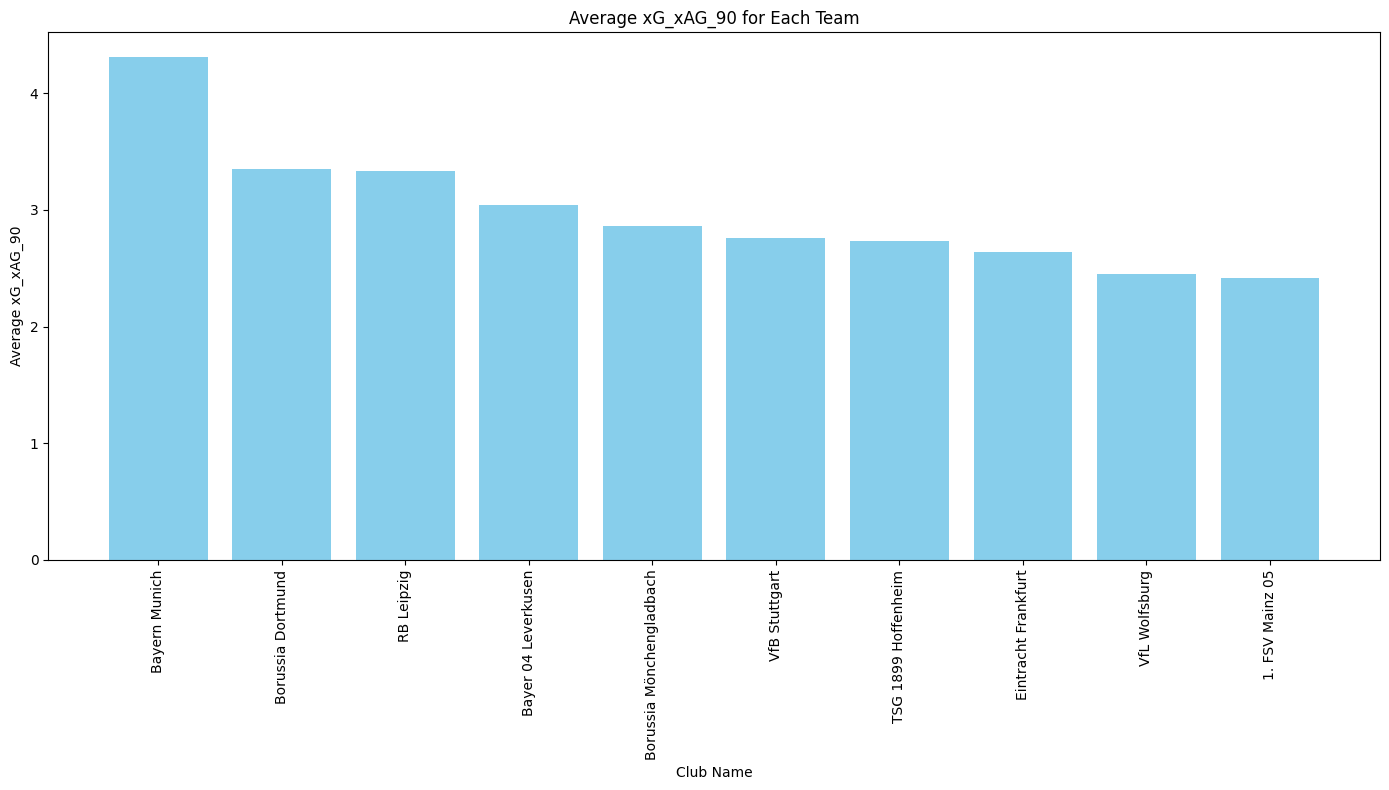

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already fetched the club DataFrame
df_club = query_db('''SELECT * FROM club''')

# Define the columns to keep
cols = ['club_id', 'League_Position', 'xG_xAG_90', 'SoT_90', 'Att_pass', 'poss_perc', 'Touches', 'Carries']

# Filter the DataFrame to keep only the specified columns
df_team_stats = df_team_stats[cols]

# Group by club_id and calculate the mean for each group, handling NaNs
df_team_stats_avg = df_team_stats.groupby('club_id').agg(lambda x: x.mean() if x.notna().any() else 0).reset_index()

# Sort the DataFrame by xG_xAG_90 in descending order
df_team_stats_avg = df_team_stats_avg.sort_values('xG_xAG_90', ascending=False)

# Merge with club DataFrame to get club names
df_plot = pd.merge(df_team_stats_avg, df_club, on='club_id')

# Plot the average xG_xAG_90 for each team
plt.figure(figsize=(14, 8))
plt.bar(df_plot['club_name'], df_plot['xG_xAG_90'], color='skyblue')
plt.title('Average xG_xAG_90 for Each Team')
plt.xlabel('Club Name')
plt.ylabel('Average xG_xAG_90')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Correlation analysis of team statistics, performance metrics and league position.

In [40]:
#Drop non integer columns for correlation
df_stats = df_team_stats.drop(columns=['Squad', 'Squad.1','Squad.2','Squad.3','Squad.4','Squad.5','Squad.6','club_name','season'])
#calculate correlation matrix
corr_matrix = df_stats.corr()

league_position_corr = corr_matrix['League_Position'].sort_values(ascending=False)
sorted_corr = league_position_corr.sort_values()
# Display the correlation coefficients
print("Features influencing 'League Position' (sorted by correlation):")
for feature, correlation in sorted_corr.items():
    print(f"Feature: {feature}, Correlation: {correlation:.4f}")


corr_df = sorted_corr.reset_index()
corr_df.columns = ['feature', 'correlation']
#corr_df.to_excel('../data/correlation/correlation_team_performance.xlsx', index=False)

Features influencing 'League Position' (sorted by correlation):
Feature: W_gk, Correlation: -0.9397
Feature: Gls, Correlation: -0.8694
Feature: Gls.1, Correlation: -0.8694
Feature: Gls_90, Correlation: -0.8692
Feature: G-PK, Correlation: -0.8668
Feature: G_PK_90, Correlation: -0.8661
Feature: G_A_90, Correlation: -0.8656
Feature: G+A, Correlation: -0.8655
Feature: G_A_PK_90, Correlation: -0.8625
Feature: GCA, Correlation: -0.8587
Feature: GCA90, Correlation: -0.8587
Feature: Ast_90, Correlation: -0.8492
Feature: Ast.1, Correlation: -0.8492
Feature: Ast, Correlation: -0.8492
Feature: xG, Correlation: -0.8344
Feature: xG.1, Correlation: -0.8344
Feature: xG_90, Correlation: -0.8344
Feature: xG_xAG_90, Correlation: -0.8279
Feature: PassLive_GCA, Correlation: -0.8247
Feature: npxG_90, Correlation: -0.8228
Feature: npxG, Correlation: -0.8227
Feature: npxG.1, Correlation: -0.8227
Feature: npxG_xAG, Correlation: -0.8194
Feature: G_Sh, Correlation: -0.8190
Feature: xAG, Correlation: -0.8105
Fea

In [45]:
# Define columns of interest
cols_of_interest = ['club_id','Club','League_Position','xG_xAG_90', 'SoT_90', 'Att_pass', 'poss_perc', 'Touches', 'Carries']

# Convert all of df_stats to numeric
df_stats = df_stats.apply(pd.to_numeric, errors='coerce')

df_stats =pd.merge(df_stats, df_standings[['club_id','Club','season_id','League_Position']], on='club_id', how='inner')

df_stats['club_id'] = df_stats['club_id'].astype('category')

# df_stats_cols = df_stats[cols_of_interest]
# df_stats_cols

# # Define colors for specific club_ids
# club_color_map = {
#     23826: 'red',
#     27: 'blue',
#     16: 'green',
#     15: 'yellow'
# }

# # Create a new column in df_stats to hold the colors based on club_id
# df_stats['color'] = df_stats['club_id'].map(club_color_map).fillna('grey')

# # Normalize the marker sizes based on season_id
# # Here, we assume a reasonable range for sizes; you can adjust the factor for better visibility
# min_size = 10
# max_size = 100
# size_factor = (df_stats['season_id'] - df_stats['season_id'].min()) / (df_stats['season_id'].max() - df_stats['season_id'].min())
# df_stats['marker_size'] = min_size + (max_size - min_size) * size_factor

# # For each column of interest, plot a scatter plot against 'League_Position'
# for col in cols_of_interest:
#     plt.figure(figsize=(10, 6))  # Set the figure size

#     # Create the scatter plot using the color column and the marker size
#     scatter = plt.scatter(df_stats[col], df_stats['League_Position'], 
#                           c=df_stats['color'], s=df_stats['marker_size'], alpha=0.7, edgecolor='w')

#     # Add a color bar - only for specific club IDs
#     # Create a custom legend for specific colors
#     handles = [plt.Line2D([0], [0], marker='o', color='w', label='Club ID 23826', markerfacecolor='red', markersize=10),
#                plt.Line2D([0], [0], marker='o', color='w', label='Club ID 27', markerfacecolor='blue', markersize=10),
#                plt.Line2D([0], [0], marker='o', color='w', label='Club ID 16', markerfacecolor='green', markersize=10),
#                plt.Line2D([0], [0], marker='o', color='w', label='Club ID 15', markerfacecolor='yellow', markersize=10),
#                plt.Line2D([0], [0], marker='o', color='w', label='Other Clubs', markerfacecolor='grey', markersize=10)]

#     plt.legend(handles=handles, loc='upper right')

#     # Adding titles and labels
#     plt.title(f'{col} vs League Position')
#     plt.xlabel(col)
#     plt.ylabel('League Position')
#     plt.grid(True)

#     # Show the plot
#     plt.show()


MergeError: Passing 'suffixes' which cause duplicate columns {'season_id_x', 'League_Position_x'} is not allowed.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_average = ['xG_xAG_90', 'SoT_90', 'Att_pass', 'poss_perc', 'Touches', 'Carries']
df_avg = df_stats.groupby('club_id')[columns_to_average + ['League_Position']].mean().reset_index()
df_avg = pd.merge(df_avg, df_standings['club_id', 'club_name'], on='club_id')
# Order by the average of League_Position
df_avg = df_avg.sort_values(by='League_Position')

# Melt the DataFrame for plotting
df_melted = df_avg.melt(id_vars=['club_id'], value_vars=columns_to_average, var_name='Stat', value_name='Average')

# Ensure the club_id is treated as a categorical variable and ordered by League_Position
df_melted['club_id'] = pd.Categorical(df_melted['club_id'], categories=df_avg['club_id'], ordered=True)

# Plot as a clustered column chart
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='club_name', y='Average', hue='Stat')
plt.title('Average Stats per Club Ordered by League Position')
plt.xlabel('Club ID')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.legend(title='Stat')
plt.show()

C:\Users\Jessica Eichel\AppData\Local\Temp\ipykernel_8600\3565405409.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



KeyError: ('club_id', 'club_name')

In [25]:
df_stats.columns

Index(['players', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast',
       'G+A',
       ...
       'PrgC_carries', '2024-03-01 00:00:00.1', 'CPA', 'Mis', 'Dis', 'Rec',
       'PrgR', 'club_id', 'League_Position', 'season_id'],
      dtype='object', length=159)